In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [2]:
df = pd.read_csv('/Users/logno/Documents/GitHub/spotify_recommender/final.csv', index_col = 0)
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
0,Move It (feat. Offset)___Lil Keed,2020-03-08 17:00,Lil Keed,Move It (feat. Offset),80666,2020-03-08 17:00:00,0.964,0.390,1,-8.812,...,122.990,audio_features,6hgEAYd3CimkLdOa4VgwTw,spotify:track:6hgEAYd3CimkLdOa4VgwTw,https://api.spotify.com/v1/tracks/6hgEAYd3Cimk...,https://api.spotify.com/v1/audio-analysis/6hgE...,171827,4,Move It (feat. Offset),66BviQeZVng0GigsRwDsLq
1,Way 2 Rare___LUCKI,2020-03-08 18:51,LUCKI,Way 2 Rare,22912,2020-03-08 18:51:00,0.644,0.678,10,-8.986,...,139.808,audio_features,53d1tlSLNunnKIQAHpHRSO,spotify:track:53d1tlSLNunnKIQAHpHRSO,https://api.spotify.com/v1/tracks/53d1tlSLNunn...,https://api.spotify.com/v1/audio-analysis/53d1...,123182,4,Days B4 III,0p1QXY0M8LRXybgy9TchHE
2,Cool It Now___New Edition,2020-03-08 19:00,New Edition,Cool It Now,290069,2020-03-08 19:00:00,0.871,0.532,10,-13.335,...,116.574,audio_features,5LkcAjqj5NOctNGi2qUjlw,spotify:track:5LkcAjqj5NOctNGi2qUjlw,https://api.spotify.com/v1/tracks/5LkcAjqj5NOc...,https://api.spotify.com/v1/audio-analysis/5Lkc...,347667,4,New Edition,68moCweQx7EoMvHdZ6HzDc
3,Feeling Safe___DLJ,2020-03-09 00:38,DLJ,Feeling Safe,139834,2020-03-09 00:38:00,0.828,0.250,1,-15.887,...,121.027,audio_features,79oR758W174pGqPA2Fky7j,spotify:track:79oR758W174pGqPA2Fky7j,https://api.spotify.com/v1/tracks/79oR758W174p...,https://api.spotify.com/v1/audio-analysis/79oR...,139835,4,Feeling Safe,6KHpq8tlBKcvmdw8sZHugV
4,Tides Out___Astairé,2020-03-09 00:42,Astairé,Tides Out,208636,2020-03-09 00:42:00,0.272,0.876,4,-7.135,...,102.718,audio_features,2sXtpY9mCTXnUTUSQqrXbX,spotify:track:2sXtpY9mCTXnUTUSQqrXbX,https://api.spotify.com/v1/tracks/2sXtpY9mCTXn...,https://api.spotify.com/v1/audio-analysis/2sXt...,591693,4,The Outlaws,5NR8rq89bfEMA7JJGzfFkp


In [3]:
df.tail()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
36219,Bankroll (feat. Lil Keed)___88GLAM,2021-03-09 22:42,88GLAM,Bankroll (feat. Lil Keed),219920,2021-03-09 22:42:00,0.778,0.591,10,-8.835,...,154.977,audio_features,4ATl9ijSiEgNs9XCpdPL2t,spotify:track:4ATl9ijSiEgNs9XCpdPL2t,https://api.spotify.com/v1/tracks/4ATl9ijSiEgN...,https://api.spotify.com/v1/audio-analysis/4ATl...,219920,4,Bankroll,0BHoLb77mSCByEkoI0juyH
36220,No Time (feat. Gunna)___Playboi Carti,2021-03-09 22:46,Playboi Carti,No Time (feat. Gunna),219453,2021-03-09 22:46:00,0.943,0.763,5,-5.568,...,139.969,audio_features,5pHJv0bgNsT9nPoK2BjNBn,spotify:track:5pHJv0bgNsT9nPoK2BjNBn,https://api.spotify.com/v1/tracks/5pHJv0bgNsT9...,https://api.spotify.com/v1/audio-analysis/5pHJ...,219453,4,Die Lit,7dAm8ShwJLFm9SaJ6Yc58O
36221,Nascar Dashcar___LUCKI,2021-03-09 22:48,LUCKI,Nascar Dashcar,116897,2021-03-09 22:48:00,0.709,0.569,6,-9.269,...,76.031,audio_features,1uJGWwJ0NZYvGD4kbKlOTl,spotify:track:1uJGWwJ0NZYvGD4kbKlOTl,https://api.spotify.com/v1/tracks/1uJGWwJ0NZYv...,https://api.spotify.com/v1/audio-analysis/1uJG...,116898,4,Nascar Dashcar,6vrHjmCAEiYOBHnNraoZiF
36222,Not A Rapper (feat. Lil Baby & Yo Gotti)___42 ...,2021-03-09 22:49,42 Dugg,Not A Rapper (feat. Lil Baby & Yo Gotti),107771,2021-03-09 22:49:00,0.888,0.715,8,-3.377,...,120.106,audio_features,0qnHywpYq7D2SGMpuHEasL,spotify:track:0qnHywpYq7D2SGMpuHEasL,https://api.spotify.com/v1/tracks/0qnHywpYq7D2...,https://api.spotify.com/v1/audio-analysis/0qnH...,107771,4,Young & Turnt 2,0pdD5ojKQ5WdZRPBY5bfv4
36223,Right Through You___Yung Bans,2021-03-09 22:52,Yung Bans,Right Through You,150465,2021-03-09 22:52:00,0.804,0.358,1,-10.999,...,144.029,audio_features,3PjeetzZNTIuWJGPcacvbS,spotify:track:3PjeetzZNTIuWJGPcacvbS,https://api.spotify.com/v1/tracks/3PjeetzZNTIu...,https://api.spotify.com/v1/audio-analysis/3Pje...,150000,4,Right Through You,1gazzdNoCkfeMwUOWxe7S2


## Data Cleaning & Comprehension

In [4]:
df.shape

(36224, 26)

In [5]:
df.columns

Index(['name', 'endTime', 'artistName', 'trackName', 'msPlayed', 'datetime',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'albumName', 'albumID'],
      dtype='object')

In [6]:
# Checking if these two columns are the same
df[['msPlayed', 'duration_ms']] 

,msPlayed,duration_ms
0,80666,171827
1,22912,123182
2,290069,347667
3,139834,139835
4,208636,591693
...,...,...
36219,219920,219920
36220,219453,219453
36221,116897,116898
36222,107771,107771


In [7]:
# Checking for null values
df.isnull().any()

name                False
endTime             False
artistName          False
trackName           False
msPlayed            False
datetime            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
albumName           False
albumID             False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36224 entries, 0 to 36223
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              36224 non-null  object 
 1   endTime           36224 non-null  object 
 2   artistName        36224 non-null  object 
 3   trackName         36224 non-null  object 
 4   msPlayed          36224 non-null  int64  
 5   datetime          36224 non-null  object 
 6   danceability      36224 non-null  float64
 7   energy            36224 non-null  float64
 8   key               36224 non-null  int64  
 9   loudness          36224 non-null  float64
 10  mode              36224 non-null  int64  
 11  speechiness       36224 non-null  float64
 12  acousticness      36224 non-null  float64
 13  instrumentalness  36224 non-null  float64
 14  liveness          36224 non-null  float64
 15  valence           36224 non-null  float64
 16  tempo             36224 non-null  float6

In [9]:
# Converting time columns to dt format
df['endTime'] = pd.to_datetime(df['endTime'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
# Checking for duplicate entries
df[df.duplicated()]

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID


In [11]:
# Create new columns with song name & artist
df['name'] = df['name'].str.replace('___',' by ')

In [12]:
# Create new column with minutes listened to
df['minutesPlayed'] = df['msPlayed'] / 60000

In [13]:
# Create new column with total length of song in minutes
df['totalMinutes'] = df['duration_ms'] / 60000

In [14]:
# Create column with only day, time, hour, year
df['date'] = [d.date() for d in df['endTime']]
df['time'] = [d.time() for d in df['endTime']]
df['day'] = df['endTime'].dt.day
df['hour'] = df['endTime'].dt.hour
df['month'] = df['endTime'].dt.month_name()
df['year'] = df['endTime'].dt.year
df['dayName'] = df['endTime'].dt.day_name()

In [15]:
# Saving a copy of this dataframe for later
xy = df.copy()

In [16]:
xy.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,albumID,minutesPlayed,totalMinutes,date,time,day,hour,month,year,dayName
0,Move It (feat. Offset) by Lil Keed,2020-03-08 17:00:00,Lil Keed,Move It (feat. Offset),80666,2020-03-08 17:00:00,0.964,0.390,1,-8.812,...,66BviQeZVng0GigsRwDsLq,1.344433,2.863783,2020-03-08,17:00:00,8,17,March,2020,Sunday
1,Way 2 Rare by LUCKI,2020-03-08 18:51:00,LUCKI,Way 2 Rare,22912,2020-03-08 18:51:00,0.644,0.678,10,-8.986,...,0p1QXY0M8LRXybgy9TchHE,0.381867,2.053033,2020-03-08,18:51:00,8,18,March,2020,Sunday
2,Cool It Now by New Edition,2020-03-08 19:00:00,New Edition,Cool It Now,290069,2020-03-08 19:00:00,0.871,0.532,10,-13.335,...,68moCweQx7EoMvHdZ6HzDc,4.834483,5.794450,2020-03-08,19:00:00,8,19,March,2020,Sunday
3,Feeling Safe by DLJ,2020-03-09 00:38:00,DLJ,Feeling Safe,139834,2020-03-09 00:38:00,0.828,0.250,1,-15.887,...,6KHpq8tlBKcvmdw8sZHugV,2.330567,2.330583,2020-03-09,00:38:00,9,0,March,2020,Monday
4,Tides Out by Astairé,2020-03-09 00:42:00,Astairé,Tides Out,208636,2020-03-09 00:42:00,0.272,0.876,4,-7.135,...,5NR8rq89bfEMA7JJGzfFkp,3.477267,9.861550,2020-03-09,00:42:00,9,0,March,2020,Monday


## Data Exploration

In [17]:
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,albumID,minutesPlayed,totalMinutes,date,time,day,hour,month,year,dayName
0,Move It (feat. Offset) by Lil Keed,2020-03-08 17:00:00,Lil Keed,Move It (feat. Offset),80666,2020-03-08 17:00:00,0.964,0.390,1,-8.812,...,66BviQeZVng0GigsRwDsLq,1.344433,2.863783,2020-03-08,17:00:00,8,17,March,2020,Sunday
1,Way 2 Rare by LUCKI,2020-03-08 18:51:00,LUCKI,Way 2 Rare,22912,2020-03-08 18:51:00,0.644,0.678,10,-8.986,...,0p1QXY0M8LRXybgy9TchHE,0.381867,2.053033,2020-03-08,18:51:00,8,18,March,2020,Sunday
2,Cool It Now by New Edition,2020-03-08 19:00:00,New Edition,Cool It Now,290069,2020-03-08 19:00:00,0.871,0.532,10,-13.335,...,68moCweQx7EoMvHdZ6HzDc,4.834483,5.794450,2020-03-08,19:00:00,8,19,March,2020,Sunday
3,Feeling Safe by DLJ,2020-03-09 00:38:00,DLJ,Feeling Safe,139834,2020-03-09 00:38:00,0.828,0.250,1,-15.887,...,6KHpq8tlBKcvmdw8sZHugV,2.330567,2.330583,2020-03-09,00:38:00,9,0,March,2020,Monday
4,Tides Out by Astairé,2020-03-09 00:42:00,Astairé,Tides Out,208636,2020-03-09 00:42:00,0.272,0.876,4,-7.135,...,5NR8rq89bfEMA7JJGzfFkp,3.477267,9.861550,2020-03-09,00:42:00,9,0,March,2020,Monday


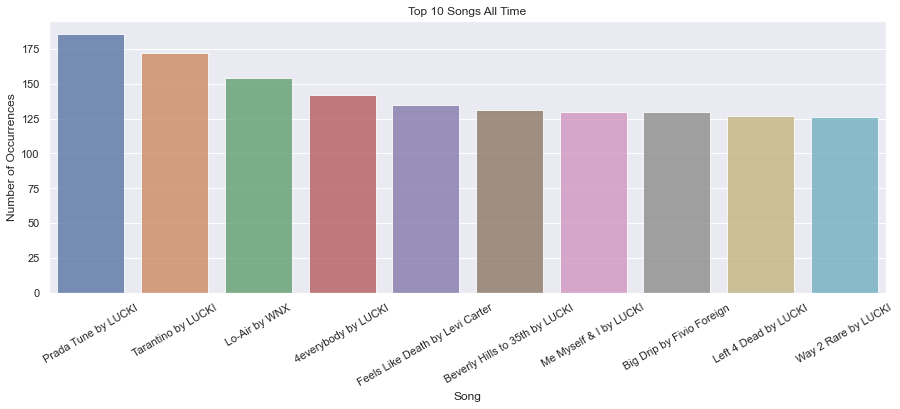

In [18]:
# What song(s) are the most listened to of all time?
song_count  = df['name'].value_counts()
song_count = song_count[:10,]
plt.figure(figsize=(15,5))
chart = sns.barplot(song_count.index, song_count.values, alpha=0.8)
plt.title('Top 10 Songs All Time')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Song', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(song_count.index, rotation=30)

plt.show()

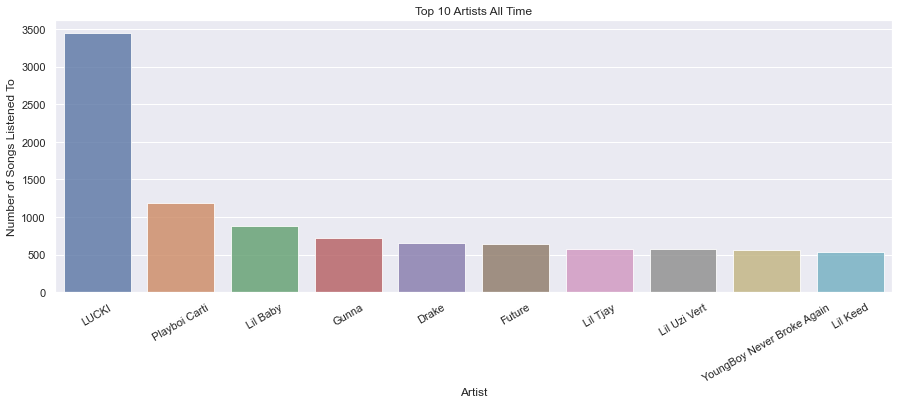

In [19]:
# What arttists are the most listened to of all time?
song_count = df['artistName'].value_counts()
song_count = song_count[:10]
plt.figure(figsize=(15,5))
chart = sns.barplot(song_count.index, song_count.values, alpha=0.8)
plt.title('Top 10 Artists All Time')
plt.ylabel('Number of Songs Listened To', fontsize=12)
plt.xlabel('Artist', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(song_count.index, rotation=30)

plt.show()

In [20]:
# Look at most popular artists by amount of time spent listening to their songs
amount_of_time = df.groupby(by='artistName')['minutesPlayed'].sum().sort_values(ascending=False)[:15]

amount_of_time

artistName
LUCKI                         6340.906550
Playboi Carti                 2902.107033
Lil Baby                      2117.212583
Drake                         1890.323067
Gunna                         1763.441133
Future                        1704.769333
Lil Tjay                      1552.566017
Lil Keed                      1425.783433
YoungBoy Never Broke Again    1410.090017
Lil Uzi Vert                  1371.642083
Thouxanbanfauni               1222.278950
Fivio Foreign                  940.304400
Polo G                         827.893033
21 Savage                      769.432600
Duwap Kaine                    768.548883
Name: minutesPlayed, dtype: float64

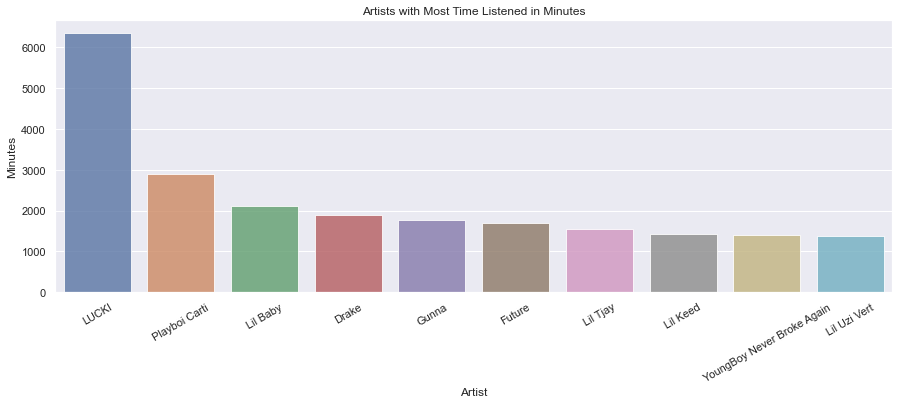

In [21]:
# What artists have the most time listened to?
b = df.groupby('artistName')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(b['artistName'], b['minutesPlayed'], alpha=0.8)
plt.title('Artists with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Artist', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(b['artistName'], rotation=30)

plt.show()

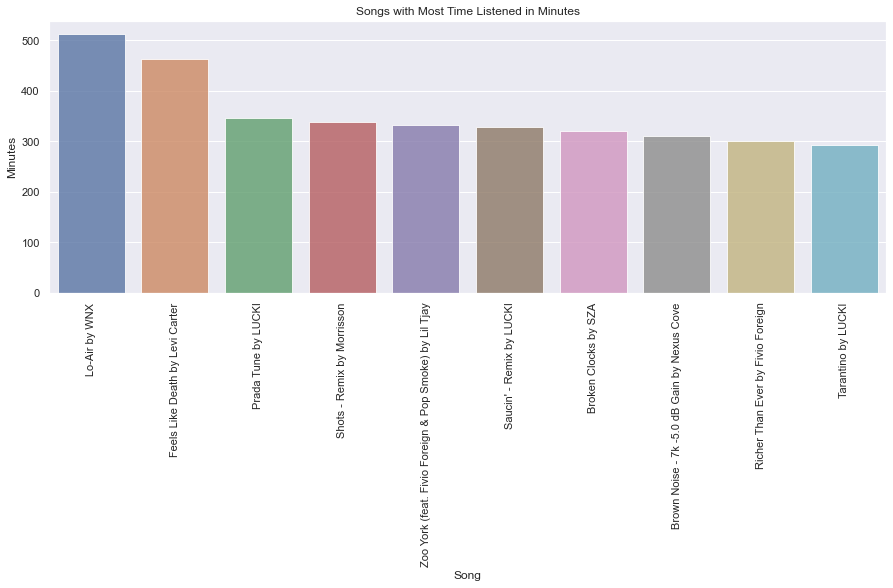

In [22]:
# What songs have the most minutes spent listening to?
c = df.groupby('name')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(c['name'], c['minutesPlayed'], alpha=0.8)
plt.title('Songs with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Song', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(c['name'], rotation=90)

plt.show()


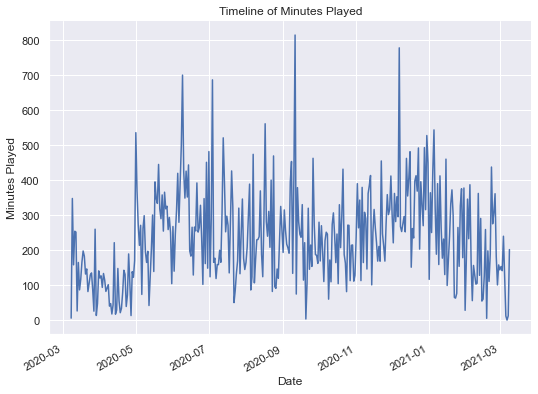

In [23]:
# How has the amount of music listened to per day changed over time?
d = df.groupby('date')['minutesPlayed'].sum().reset_index()
chart = sns.relplot(x='date', y='minutesPlayed', kind="line", data=d).set(title='Timeline of Minutes Played')
chart.fig.autofmt_xdate()
chart.fig.set_figwidth(8.27)
chart.fig.set_figheight(5.7)
chart.set(xlabel='Date', ylabel='Minutes Played')

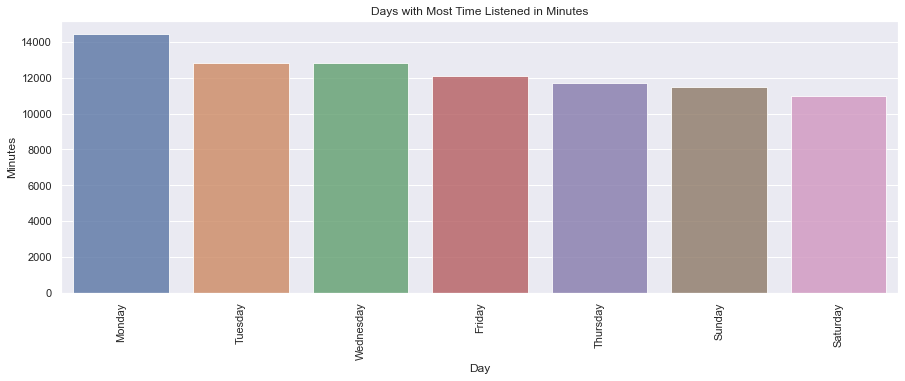

In [24]:
# Which day of the week has the most minutes listened to?
e = df.groupby('dayName')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(e['dayName'], e['minutesPlayed'], alpha=0.8)
plt.title('Days with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Day', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(e['dayName'], rotation=90)

plt.show()


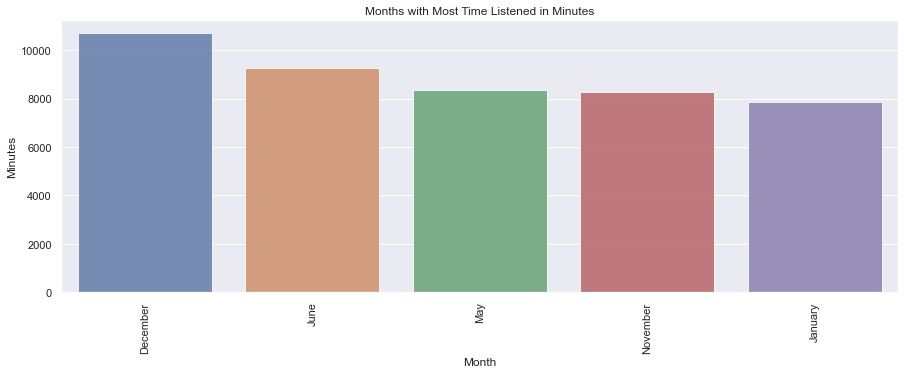

In [25]:
#Which month of the year has the most minutes of music listened to?
e = df.groupby('month')['minutesPlayed'].sum().sort_values(ascending=False)[:5].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(e['month'], e['minutesPlayed'], alpha=0.8)
plt.title('Months with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Month', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(e['month'], rotation=90)

plt.show()


### Understanding the features of each song

acousticness - float - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness - float - Detects the presence of an audience in the recording.

loudness - float - The overall loudness of a track in decibels (dB).

speechiness - float - Speechiness detects the presence of spoken words in a track.

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - int - The estimated overall key of the track.

In [26]:
# Creating new dateframe to analyze only audio features. 
df = df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','endTime', 'day', 'hour', 'month', 'year', 'dayName']]
af = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,endTime,day,hour,month,year,dayName
0,0.964,0.390,1,-8.812,0.3080,0.093600,0.00000,0.0929,0.106,122.990,2020-03-08 17:00:00,8,17,March,2020,Sunday
1,0.644,0.678,10,-8.986,0.0331,0.116000,0.00000,0.0742,0.699,139.808,2020-03-08 18:51:00,8,18,March,2020,Sunday
2,0.871,0.532,10,-13.335,0.0677,0.126000,0.00819,0.3210,0.740,116.574,2020-03-08 19:00:00,8,19,March,2020,Sunday
3,0.828,0.250,1,-15.887,0.0640,0.090200,0.68000,0.0892,0.215,121.027,2020-03-09 00:38:00,9,0,March,2020,Monday
4,0.272,0.876,4,-7.135,0.0397,0.000042,0.01910,0.1460,0.585,102.718,2020-03-09 00:42:00,9,0,March,2020,Monday


[Text(0.5, 1.0, 'Coorelations Between Song Features')]

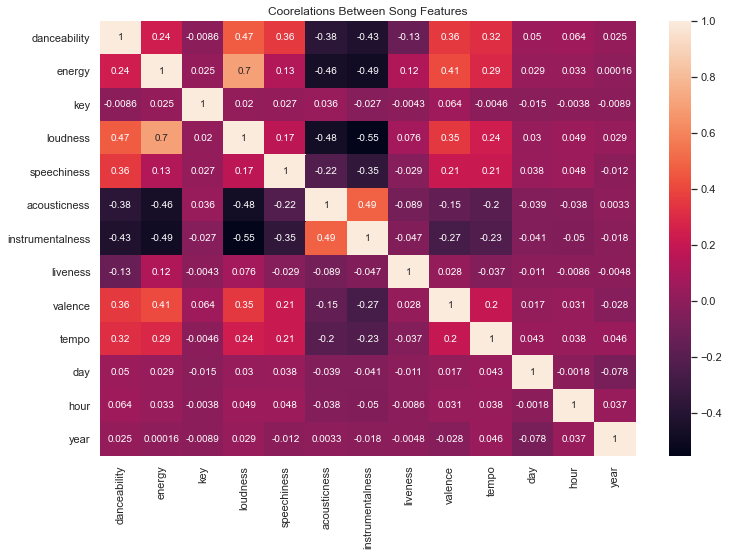

In [27]:
# Understanding how song features relate
corr = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True).set(title='Coorelations Between Song Features')

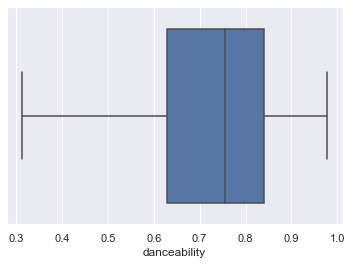

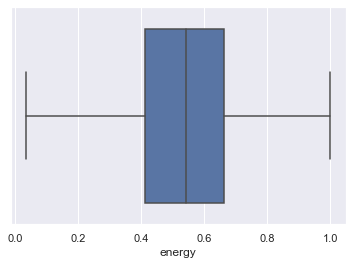

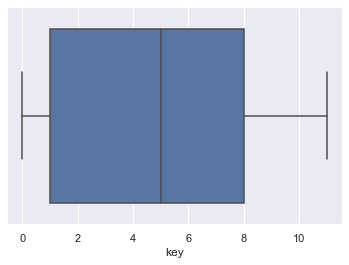

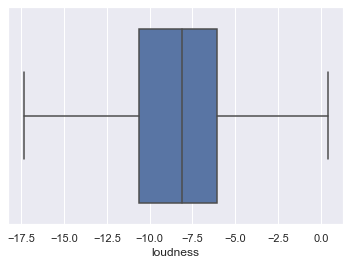

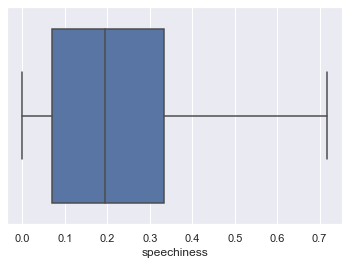

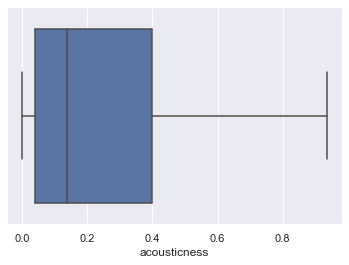

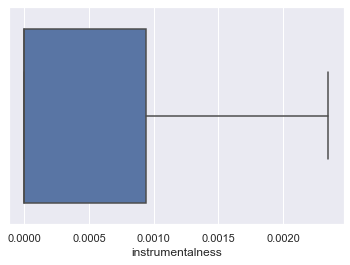

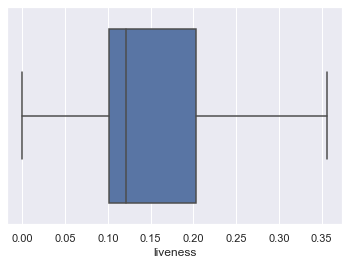

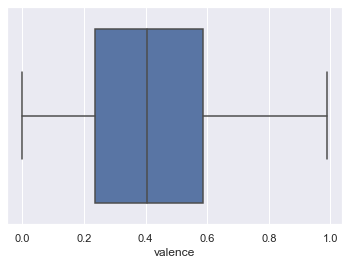

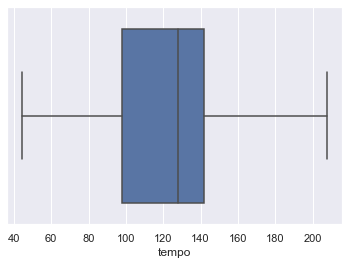

In [28]:
# What is the average value for each audio feature?
for feature in af:
    sns.boxplot(showfliers = False, x=df[feature])
    plt.show()

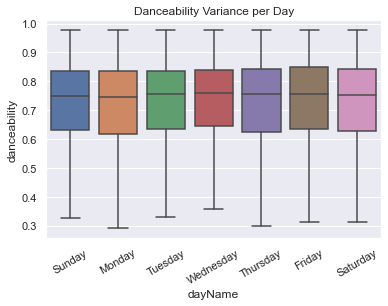

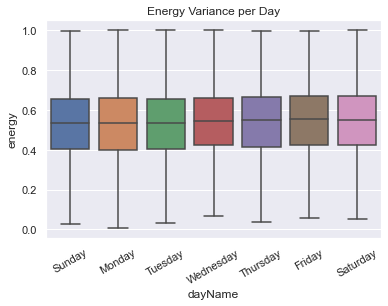

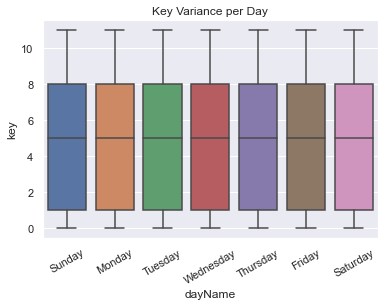

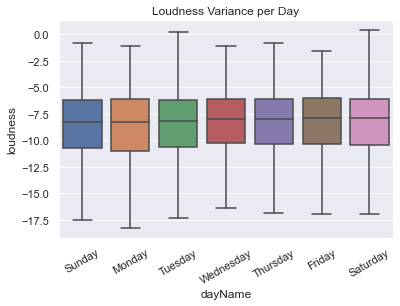

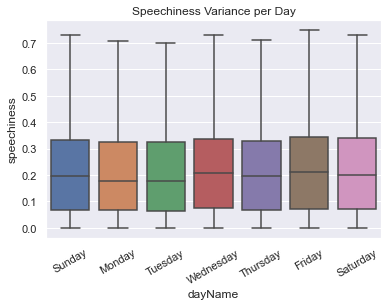

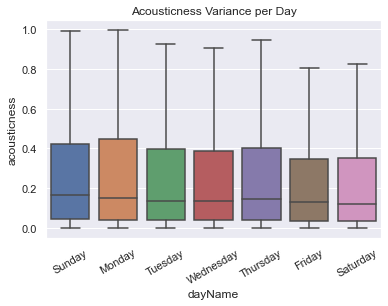

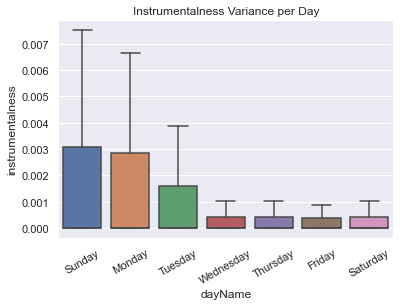

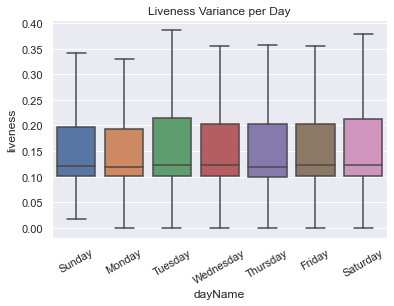

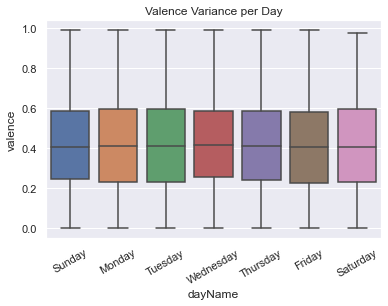

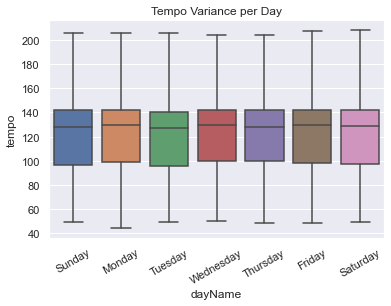

In [29]:
# What is the variance of each feature per day?(Hidden output)
for feature in af:
    ax = sns.boxplot(x="dayName", y=feature, data=df, showfliers = False)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(feature.title() + ' Variance per Day')
    plt.show()

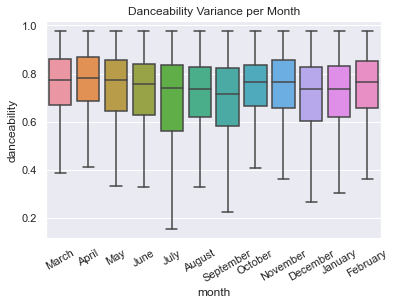

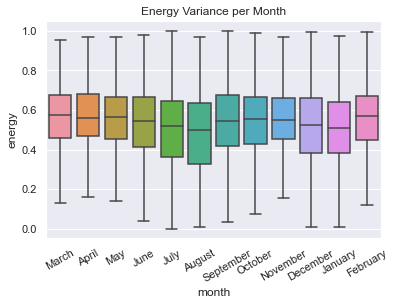

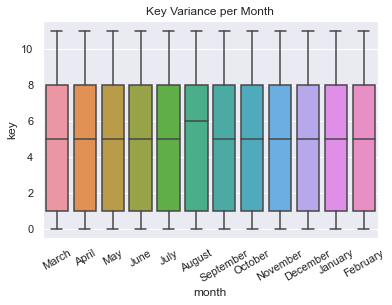

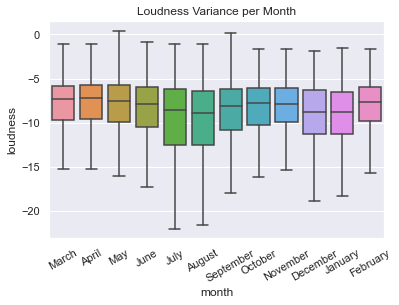

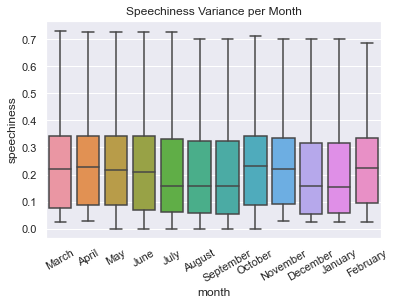

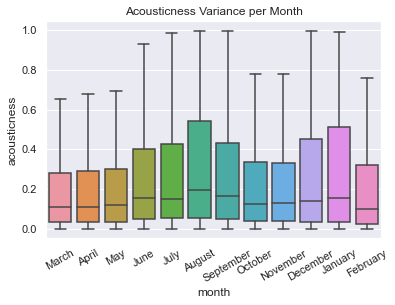

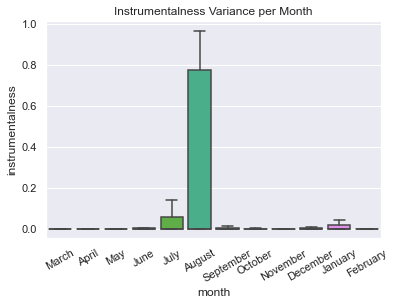

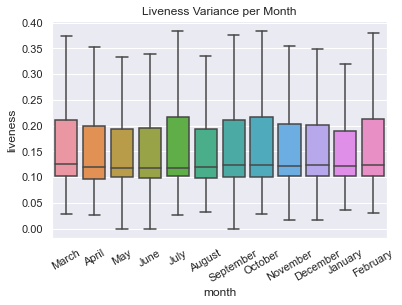

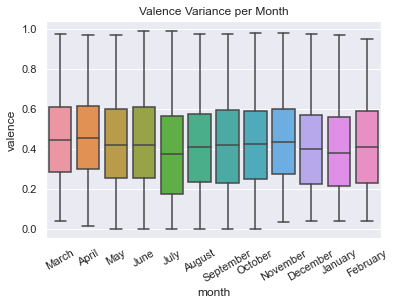

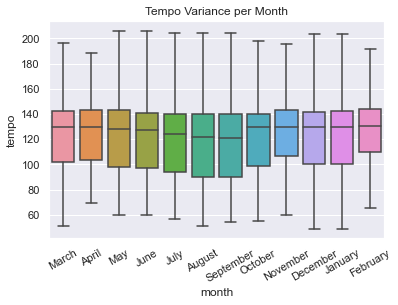

In [30]:
# What is the variance of each feature per month? (Hidden output)
for feature in af:
    ax = sns.boxplot(x="month", y=feature, data=df, showfliers = False)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(feature.title() + ' Variance per Month')
    plt.show()

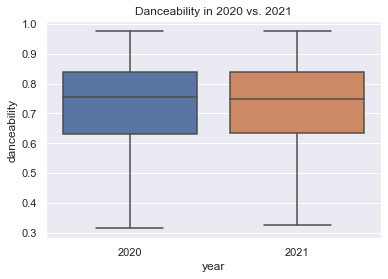

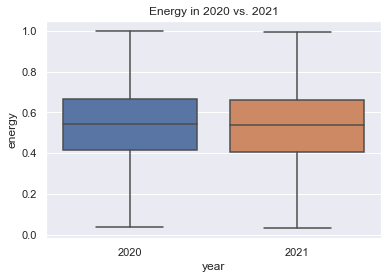

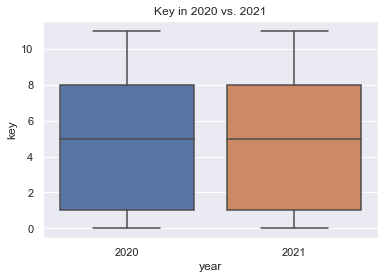

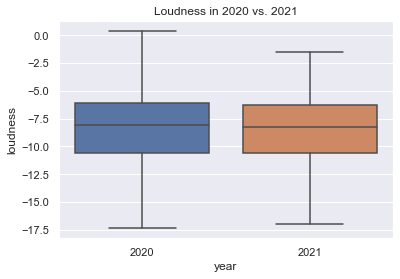

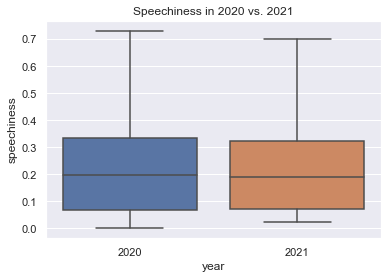

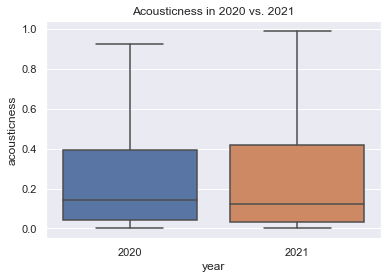

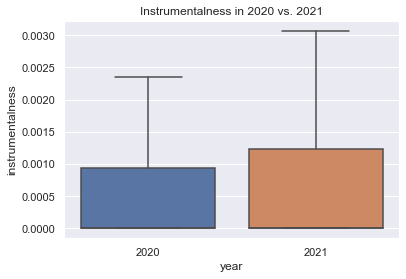

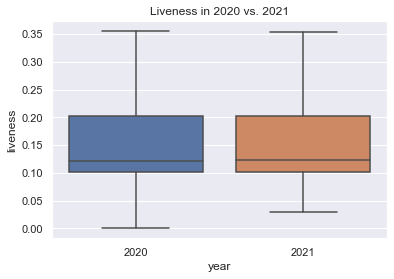

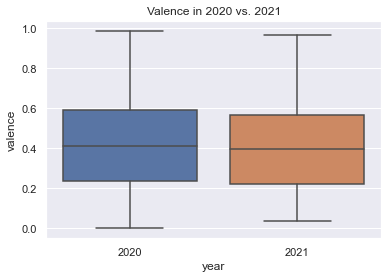

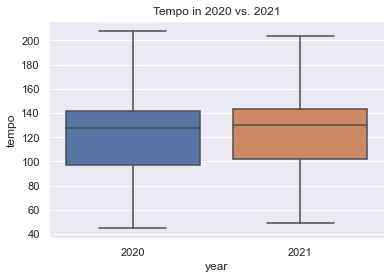

In [31]:
# What is the variance of each feature per year? (Hidden output)
for feature in af:
    ax = sns.boxplot(x="year", y=feature, data=df, showfliers = False)
    plt.title(feature.title() + ' in 2020 vs. 2021')
    plt.show()

### Analyzing top 100 songs

In [34]:
# Creating a new dataframe with audio features of top 100 songs
song_count = xy['name'].value_counts()[:100]
xy = xy.loc[xy['name'].isin(song_count.index)].drop_duplicates(subset=['name'])
xy.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,albumID,minutesPlayed,totalMinutes,date,time,day,hour,month,year,dayName
1,Way 2 Rare by LUCKI,2020-03-08 18:51:00,LUCKI,Way 2 Rare,22912,2020-03-08 18:51:00,0.644,0.678,10,-8.986,...,0p1QXY0M8LRXybgy9TchHE,0.381867,2.053033,2020-03-08,18:51:00,8,18,March,2020,Sunday
27,Chrome Heart Tags by Lil Uzi Vert,2020-03-09 02:40:00,Lil Uzi Vert,Chrome Heart Tags,212821,2020-03-09 02:40:00,0.702,0.768,0,-4.055,...,7IyoGB8J31fvQDwGtHAq9m,3.547017,3.547017,2020-03-09,02:40:00,9,2,March,2020,Monday
29,Commercial (feat. Lil Uzi Vert) by Lil Baby,2020-03-09 02:43:00,Lil Baby,Commercial (feat. Lil Uzi Vert),134222,2020-03-09 02:43:00,0.892,0.486,11,-8.637,...,1ynyQdPQiXdYJNQEDL1S3d,2.237033,3.570250,2020-03-09,02:43:00,9,2,March,2020,Monday
45,wokeuplikethis* by Playboi Carti,2020-03-09 03:05:00,Playboi Carti,wokeuplikethis*,235535,2020-03-09 03:05:00,0.785,0.620,8,-6.667,...,4rJgzzfFHAVFhCSt2P4I3j,3.925583,3.925583,2020-03-09,03:05:00,9,3,March,2020,Monday
93,Poles by Quin Nfn,2020-03-09 15:06:00,Quin Nfn,Poles,10789,2020-03-09 15:06:00,0.902,0.472,1,-6.802,...,7mDCo8ejyIyI810PsHG4lM,0.179817,3.199583,2020-03-09,15:06:00,9,15,March,2020,Monday


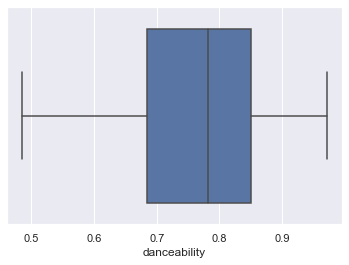

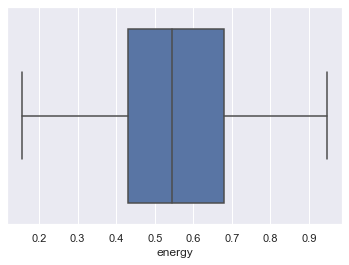

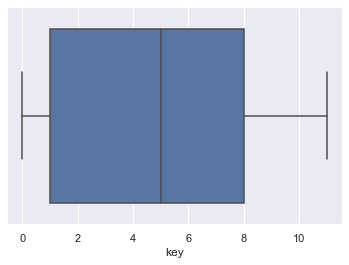

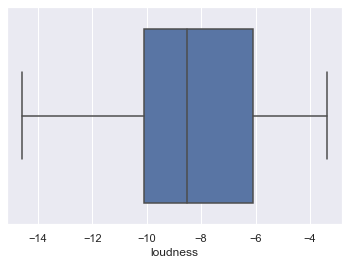

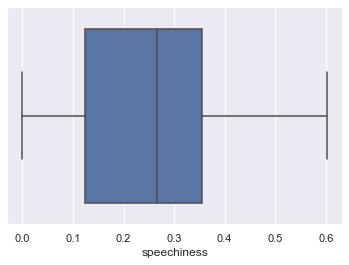

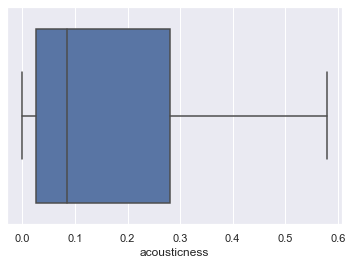

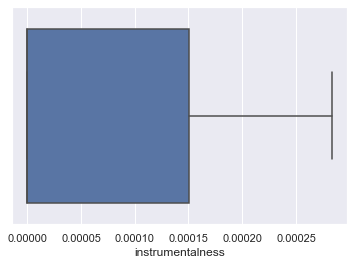

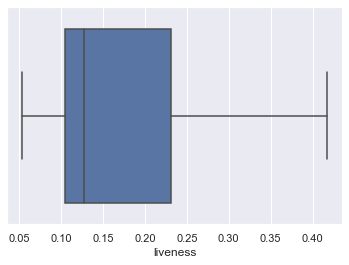

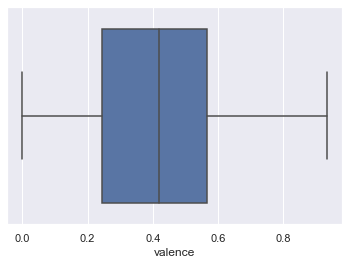

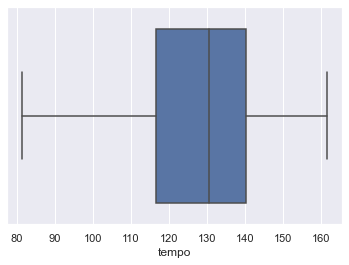

In [36]:
# What is the average value for each audio feature?
for feature in af:
    sns.boxplot(showfliers = False, x=xy[feature])
    plt.show()